# Reversible Adding Algorithms

In this notebook, I illustrate reversible algorithms for performing the simple operation of adding two $n-bit$ natural numbers.

**IMPORTANT:** Make sure that you understand the fundamental ideas of the circuit model of computation, and the notions of reversible computations. This notebook includes detailed account of the fundamentals of quantum computing in a sert of handwritten notes. Please revise the section on the circuit model and the fundamental reversible universal gates before embarking on this notebook. 

In [ ]:
! pip install qiskit

These are all the imports necessary for visualizing all the results of this notebook and executing the algorithms using Qiskit.

In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

## Reversible Classical Algorithms

I first discuss the standard application of $n$-bit addres using the cascaded *Half Adder* (HA) and *Full Adder* (FA) architecture. I start my discussion by showing how to build HAs using both Fredkin and Toffoli gates. Then I implement a FA using only Toffoli gates. Finally, I implement an $n$-bit reversible adder.

### Reversible HA Using Fredkin and CNOT Gates

In this notebook I illustrate how to implement a classical reversible half adder (HA). It computes XOR of the two adding bits via a pair of Fredkin gates. CNOTs are used for *uncomputation*. The schematic of the circuit is shown on a cell. When simulations are performed, the first two most significant bits correspond to the addition $x + y$.

**Important**: Input bits are 0 and 4. It is possible to change the numbering of the bits to be more consistent with the convention of the circuit model.

In [3]:
qc_RevSum = QuantumCircuit(7,7)

# Set up bits to add
qc_RevSum.h(0)
qc_RevSum.h(4)
qc_RevSum.barrier()

# Init ancilla qbit for XOR
qc_RevSum.x(1)

# Apply Fredkin gates for CSWAP
qc_RevSum.fredkin(4,1,2)
qc_RevSum.fredkin(0,1,2)
qc_RevSum.fredkin(0,3,4)
qc_RevSum.barrier()

# Copy Using Cnots
qc_RevSum.cnot(2,5)
qc_RevSum.cnot(3,6)
qc_RevSum.barrier()

# Uncompute to restore initial state
qc_RevSum.fredkin(0,3,4)
qc_RevSum.fredkin(0,1,2)
qc_RevSum.fredkin(4,1,2)
qc_RevSum.x(1)
qc_RevSum.barrier()

# Measure bits
for bit in range(7):
  qc_RevSum.measure(bit,bit)

Notice that the fourth block performs uncomputation, while the third is a copy performed by a pair of CNOTs. Remember all qbits are initialised to zero.

In [4]:
qc_RevSum.draw()

┌───┐ ░                ░            ░                ░ ┌─┐               »
q_0: ┤ H ├─░──────────■──■──░────────────░──■──■──────────░─┤M├───────────────»
     └───┘ ░ ┌───┐    │  │  ░            ░  │  │    ┌───┐ ░ └╥┘┌─┐            »
q_1: ──────░─┤ X ├─X──X──┼──░────────────░──┼──X──X─┤ X ├─░──╫─┤M├────────────»
           ░ └───┘ │  │  │  ░            ░  │  │  │ └───┘ ░  ║ └╥┘┌─┐         »
q_2: ──────░───────X──X──┼──░───■────────░──┼──X──X───────░──╫──╫─┤M├─────────»
           ░       │     │  ░   │        ░  │     │       ░  ║  ║ └╥┘┌─┐      »
q_3: ──────░───────┼─────X──░───┼────■───░──X─────┼───────░──╫──╫──╫─┤M├──────»
     ┌───┐ ░       │     │  ░   │    │   ░  │     │       ░  ║  ║  ║ └╥┘┌─┐   »
q_4: ┤ H ├─░───────■─────X──░───┼────┼───░──X─────■───────░──╫──╫──╫──╫─┤M├───»
     └───┘ ░                ░ ┌─┴─┐  │   ░                ░  ║  ║  ║  ║ └╥┘┌─┐»
q_5: ──────░────────────────░─┤ X ├──┼───░────────────────░──╫──╫──╫──╫──╫─┤M├»
           ░                ░ └───┘┌─┴─┐ ░                ░  ║  ║  ║  ║  ║ └╥┘»
q_6: ──────░────────────────░──────┤ X ├─░────────────────░──╫──╫──╫──╫──╫──╫─»
           ░                ░      └───┘ ░                ░  ║  ║  ║  ║  ║  ║ »
c: 7/════════════════════════════════════════════════════════╩══╩══╩══╩══╩══╩═»
                                                             0  1  2  3  4  5 »
«        
«q_0: ───
«        
«q_1: ───
«        
«q_2: ───
«        
«q_3: ───
«        
«q_4: ───
«        
«q_5: ───
«     ┌─┐
«q_6: ┤M├
«     └╥┘
«c: 7/═╩═
«      6

Just for fun, instead of initialising the circuit with X gates, like with clasical bits, initialise them with **Hadamard gates**. The result is quite awesome. The circuit is able to compute all possible combinations of input bits:

$$0 + 1 = 01$$
$$0 + 0 = 00$$
$$1 + 0 = 01$$
$$1 + 1 = 10$$

The final state is a superposition of all posible inputs and outputs of a HA. Moreover, all possible combinations have the same probability of occurence. I guess this might be what quantum parallelism means.

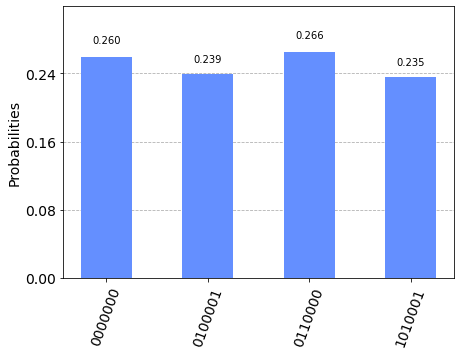

In [5]:
counts = execute(qc_RevSum,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

## Reversible HA using Toffoli gates

This approach is far more simple. Not only is the number of gates needed reduced, but also there is no need for uncomputation.

In [6]:
qc_RevSumT = QuantumCircuit(5,5)

# Set up bits to add
qc_RevSumT.h(0)
qc_RevSumT.h(2)
qc_RevSumT.barrier()

# Init ancilla qbit for XOR
qc_RevSumT.x(1)

# Apply Fredkin gates for CSWAP
qc_RevSumT.toffoli(0,1,2)
qc_RevSumT.toffoli(1,2,3)
qc_RevSumT.toffoli(0,1,2)
qc_RevSumT.toffoli(0,2,4)
qc_RevSumT.barrier()

# Uncomputation
qc_RevSumT.x(1)
qc_RevSumT.barrier()

# Measure bits
for bit in range(5):
  qc_RevSumT.measure(bit,bit)

In [7]:
qc_RevSumT.draw()

┌───┐ ░                           ░       ░ ┌─┐            
q_0: ┤ H ├─░────────■─────────■────■───░───────░─┤M├────────────
     └───┘ ░ ┌───┐  │         │    │   ░ ┌───┐ ░ └╥┘┌─┐         
q_1: ──────░─┤ X ├──■────■────■────┼───░─┤ X ├─░──╫─┤M├─────────
     ┌───┐ ░ └───┘┌─┴─┐  │  ┌─┴─┐  │   ░ └───┘ ░  ║ └╥┘┌─┐      
q_2: ┤ H ├─░──────┤ X ├──■──┤ X ├──■───░───────░──╫──╫─┤M├──────
     └───┘ ░      └───┘┌─┴─┐└───┘  │   ░       ░  ║  ║ └╥┘┌─┐   
q_3: ──────░───────────┤ X ├───────┼───░───────░──╫──╫──╫─┤M├───
           ░           └───┘     ┌─┴─┐ ░       ░  ║  ║  ║ └╥┘┌─┐
q_4: ──────░─────────────────────┤ X ├─░───────░──╫──╫──╫──╫─┤M├
           ░                     └───┘ ░       ░  ║  ║  ║  ║ └╥┘
c: 5/═════════════════════════════════════════════╩══╩══╩══╩══╩═
                                                  0  1  2  3  4

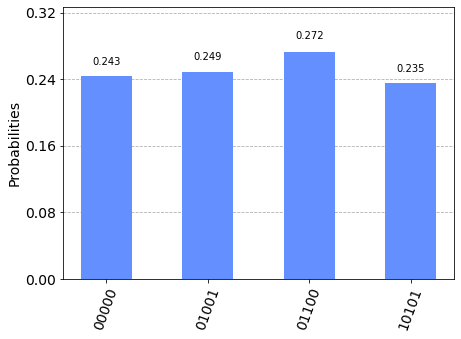

In [8]:
counts = execute(qc_RevSumT,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In this cell I implement a function that buids a reversible HA using Toffoli gates. This will be usefull later for devising a Reversible $n$-bit adder.

In [9]:
def HA(a,b,s0,s1):
  '''
  Function for implementing
  full adder in part of circuit
  '''
  ha_circ = QuantumCircuit(4)
  # Implement HA
  ha_circ.cx(b,s0)
  ha_circ.cx(a,s0)
  ha_circ.toffoli(a,b,s1)
  # Convert all circuit to gate
  ha_gate = ha_circ.to_gate()
  ha_gate.name = 'HA'
  return ha_gate 

## Reversible Full Adder

The structure of the HA is readily extended to produce a Full Adder (FA). The HA adds two bits. To build a FA, it is necessary to add the result of the HA with another bit. Without being too technical, it is clear that the less significant bit is just de XOR of the lest significant bit of the HA output, and the other bit. The most significant bit of the output of FA depends of the most significant bit of the HA ouput, and the other bit. The most significant bit of FA output is the AND of those bits. I present a reversible FA.

**Important:** I will use CNOT gates instead of Toffoli gates to perform XORing for simplicity.

In [10]:
def FA(a,b,c,s0,s1):
  '''
  Function for implementing
  full adder in a part of the
  circuit
  '''
  fa_circ = QuantumCircuit(5)
  # Implement HA
  fa_circ.cx(b,s0)
  fa_circ.cx(a,s0)
  fa_circ.toffoli(a,b,s1)
  # Compute carry bit
  fa_circ.toffoli(c,s0,s1)
  # Update less significant bit
  fa_circ.cx(c,s0)
  # Convert all circuit to gate
  fa_gate = fa_circ.to_gate()
  fa_gate.name = 'FA'
  return fa_gate

## Reversible $n$-bit Adder

What follows is cascading the FAs to perform the convential addition algorithm that is taught to every preschooler in the planet: add columns, compute the carry, add columns and the carry, repeat... The implementation that I present in this section is no different from that. It starts with a HA that computes the addition of the unit bits. The most significant bit of this result is used as a carry that propagates throughout the rest of the summation of the bits, using FAs.

### Register initialization

The input register containes both ancilla and input bits. The ancilla bits are initializated according to the numbers that are to be added. The bits of the inputs are put adjacent in the input register, pretty much like a conventional adder.

**Pro Tip:** In the cell bellow, substitute both NOT gates (```circuit.x```) for Hadamard gates (```circuit.h```) to visualize what quantum parallelism is all about.

In [11]:
from math import log2
import numpy as np

def InitInput(circuit,n1,n2):
  '''
  Function for initialising
  adder circuit input
  '''
  if len(n1) == len(n2):
    for idx in range(0,len(n1)):
      # Initialise n1
      if n1[-(idx+1)] == '1': 
        circuit.x(idx*4)
      # Initialise n2
      if n2[-(idx+1)] == '1':
        circuit.x(idx*4+1)
    circuit.barrier()
  else:
    print('Input strings do not have same size')

I defined a function that converts an integer into an $n$-bit string to simplify user experience.

In [12]:
def num2bits(num, nbits):
  '''
  Convert num to nbit string
  '''
  formt = '{0:0'+str(nbits)+'b}'
  return formt.format(int(num))

## The Reversible Cascaded Algorithm

The trick is pretty simple: use a HA to add the unit bits of the inputs, then cascade FAs to propagate the carries pretty much like on preschool.

The following cell implements the reversible algorithm on a circuit. This being reversible can be run on an actual quantum computer! However, most IBMQ devices only have up to 9 qbits, so you would not be able to compute very large sums. For now...

In [13]:
def AdderCircuit(n1,n2):
  # Determine size of bit strings
  nbits = int(log2(max(n1,n2))+1)
  # Format input properly
  num1 = num2bits(n1,nbits)
  num2 = num2bits(n2,nbits)
  # Create adder circuit
  adder_circ = QuantumCircuit(4*nbits,nbits+1)
  # Initialize input qbits
  InitInput(adder_circ,num1,num2)
  # Define HA and FA gates
  idxbits = np.array(range(4))
  HAgate = HA(*idxbits)
  idxbits = np.array(range(5))
  FAgate = FA(*idxbits)
  # Stage first HA
  adder_circ.append(HAgate,range(4))
  # Stage remaining FA
  for idx in range(1,nbits):
    adder_circ.append(FAgate,range(idx*4-1,idx*4+4))
  adder_circ.barrier()
  # Measure sum
  MeasureSum(adder_circ,nbits)
  # Return result of sum as binary string
  s = n1+n2
  return adder_circ, num2bits(s,nbits+1)

Finally, I extract the result of the addition by performing a measurement of the register.

**IMPORTANT:** Make sure you understand why a measurement is needed to get the result. This is true for both classical and quantum computations ;).

In [14]:
def MeasureSum(circuit,nbits):
  '''
  Function for measuring output result
  '''
  # Measure last n bits of sum
  for idx in range(nbits):
    circuit.measure(idx*4+2,idx)
  # Measure most significant bit of sum
  circuit.measure(4*nbits-1,nbits)

Now lets see the adder in action...

Change the values of the input numbers to the adder and enjoy the magic of reversible computation.

In [26]:
n1 = 13
n2 = 23

In [16]:
myadder, res = AdderCircuit(n1,n2)
myadder.draw()

░ ┌─────┐               ░             
 q_0: ──────░─┤0    ├───────────────░─────────────
      ┌───┐ ░ │     │               ░             
 q_1: ┤ X ├─░─┤1    ├───────────────░─────────────
      └───┘ ░ │  HA │               ░ ┌─┐         
 q_2: ──────░─┤2    ├───────────────░─┤M├─────────
            ░ │     │┌─────┐        ░ └╥┘         
 q_3: ──────░─┤3    ├┤0    ├────────░──╫──────────
      ┌───┐ ░ └─────┘│     │        ░  ║          
 q_4: ┤ X ├─░────────┤1    ├────────░──╫──────────
      ├───┤ ░        │     │        ░  ║          
 q_5: ┤ X ├─░────────┤2 FA ├────────░──╫──────────
      └───┘ ░        │     │        ░  ║ ┌─┐      
 q_6: ──────░────────┤3    ├────────░──╫─┤M├──────
            ░        │     │┌─────┐ ░  ║ └╥┘      
 q_7: ──────░────────┤4    ├┤0    ├─░──╫──╫───────
      ┌───┐ ░        └─────┘│     │ ░  ║  ║       
 q_8: ┤ X ├─░───────────────┤1    ├─░──╫──╫───────
      ├───┤ ░               │     │ ░  ║  ║       
 q_9: ┤ X ├─░───────────────┤2 FA ├─░──╫──╫───────
      └───┘ ░               │     │ ░  ║  ║ ┌─┐   
q_10: ──────░───────────────┤3    ├─░──╫──╫─┤M├───
            ░               │     │ ░  ║  ║ └╥┘┌─┐
q_11: ──────░───────────────┤4    ├─░──╫──╫──╫─┤M├
            ░               └─────┘ ░  ║  ║  ║ └╥┘
 c: 4/═════════════════════════════════╩══╩══╩══╩═
                                       0  1  2  3

Lets see what the computation should output

In [17]:
# Print result of adder
print(res)

1101


Now lets see what a reversible algorithm on a quantum computer produces...

**Important:** If you desire to run this program on an actual IBMQ device, make sure to register your IBM Account token and change the Aer backend. Most IBMQ devices only have very few qbits, so this algorithm may not run should you add big numbers.

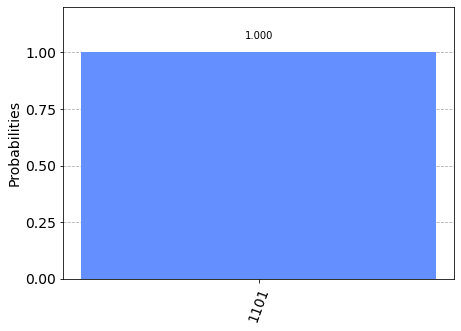

In [18]:
counts = execute(myadder,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

## Quantum Sumation Algorithm

Now, the classical algorithm depicted above has a terrible problem. It is not very efficient since a reversible function like the above should include uncomputation. Uncomputation is very important in order to avoid problems related to entanglement. A better aproach is to compute the carry bits first, undo this computation, and then compute the bitwise XOR plus the carry bits.

This approach is not more efficient than the above in terms of circuit depth, but is more efficient in terms of space. The classical approach uses $n$ more bits than the quantum approach.

**Important**: In the circuit below, it seems like substituting C gates by CNOT gates also does the trick. I believe that the reason why C gates are used on the lectures is that they uncompute the carry bit. At first glance, it is obvious that they undo de bitwise XOR of the input chains. However, that the may uncompute the carry bit is not direct. As a matter of fact, application oc C gate does not uncompute the carry bits in all cases, and thus is better to use CNOT gates rather than C gates to undo de bitwise XOR before computing the less significant bits of the output string.

### Input register and Initialization

The goal is to device a quantum algorithm for adding two $n$-bit numbers. Therefore, the whole circuit should include at least $n+1$ bits. As mentioned before, the quantum algorithm computes carries in the sumation first; then undoes computation, and proceeds with computation of the bits of the sum string.

This requieres keepin track of the

* Carry bits
* summand 1 bits
* summand 2 bits
* $n+1$th bit

As a result, the input register is expected to have $3n + 1$ qbits. A "phantom" carry bit is going to be assigned to the summation of the $0$th bits. Therefore, the register can be decomposed in groups of 3 qbits, plus the $n+1$th bit of the sum string. Each group of three qubits (modulo 3) has

* A carry bit
* a summand 1 bit
* a summand 2 bit

In that order, following the convention that the units bits are associated to the index 0 on qiskit numeration. The following cell implements register initialization. Remember that Qiskit initializes all qbits to $|0\rangle$ state at the beginning of any computation. Therefore, a note gate changes the sate of a qbit to $|1\rangle$, depending on the strings that are to be added.

**IMPORTANT:** The sentence ```circuit.x(idx)```, simply adds a NOT gate to que $i$th qbit in the input register. If you want to see quantum parallelism in action, change the NOT gates for Hadamard gates as before.

In [19]:
def QuInitInput(circuit,n1,n2):
  '''
  Function for initialising
  adder circuit input
  '''
  if len(n1) == len(n2):
    for idx in range(0,len(n1)):
      # Initialise n1
      if n1[-(idx+1)] == '1': 
        circuit.x(idx*3+1)
      # Initialise n2
      if n2[-(idx+1)] == '1':
        circuit.x(idx*3+2)
    circuit.barrier()
  else:
    print('Input strings do not have same size')

### Carry Computation

Remeber that the first stage of the algorithm is performing carry computation. The carry is the most significant bit of the summation of 3 bits. Surprisingly, carry computation does not require explicit knowledge of the units bit. The carry bit has a closed expression

$$c_i = (y_i \land x_i) \oplus((x_i \oplus y_i) \land z_i)$$

Supposed we are adding bits $x_i$, $y_i$, $z_i$. This can be seen by evaluating the cases:

* If $x_i = y_i = 1$, then the carry is necessarily $c_i = 1$.
* If $x_i = y_i = 0$, then the carry is necessarily $c_i = 0$.
* If $x_i \neq 0$, then the carry is necessarily $c_i = z_i$.

The following cell implements a quantum algorithm for computing the carry bit of adding three bits. This is based on the use of *Toffoli gate* as a reversible AND, and CNOT, as a reversible XOR. As a thought exercise, it is advised that readers show themselves that this gate performs the claimed operation reversibly, and that ```s1``` actually contains the carry of the three bit sumation.

**Important:** All quantum computations must be *uncomputed*. Therefore, I include an inverse algorithm that performs this action.

After propagating the carry bits (something weird, isn't it!), It is necessary to compute the bits of the sum string. Yes, carry propagation mainly works for computing the $n+1$th bit at this stage.


In [20]:
def CarryBit(c,a,b,s1):
  '''
  Function for implementing
  carry bit calculation 
  part of circuit
  '''
  c_circ = QuantumCircuit(4)
  # Implement Carry bit gate
  c_circ.toffoli(a,b,s1)
  c_circ.cx(a,b)
  c_circ.toffoli(c,b,s1)
  # Convert all circuit to gate
  c_gate = c_circ.to_gate()
  c_gate.name = 'C'
  return c_gate

def CarryBit_dg(c,a,b,s1):
  '''
  Function for uncomputing
  carry bit calculation
  '''
  c_circ = QuantumCircuit(4)
  # Implement Carry bit gate in reverse
  c_circ.toffoli(c,b,s1)
  c_circ.cx(a,b)
  c_circ.toffoli(a,b,s1)
  # Convert all circuit to gate
  c_gate = c_circ.to_gate()
  c_gate.name = 'C_dg'
  return c_gate

### Sum Bit Computation

Once the carry bits are computed, a third of the work has been done. What is left is to add the carry and the input bits (three bits in total), to compute the bits that correspond to the sum string. If three bits are to be added, it is not difficult to see that the sum bit corresponds to

$$s_i = x_i \oplus y_i \oplus z_i$$

Supposed the bits to be added are $x_i$, $y_i$, $z_i$. This XORing is performed by the algorithm programmed in the next cell.

In [21]:
def SumBit(c,a,b):
  '''
  Function for implementing
  sum bit computation
  '''
  s_circ = QuantumCircuit(3)
  # Perform XORing
  s_circ.cx(a,b)
  s_circ.cx(c,b)
  # Convert all circuit to gate
  s_gate = s_circ.to_gate()
  s_gate.name = 'S'
  return s_gate


### The Reversible Backwards Algorithm

The whole algorithms propagates carry compuation without the need for computing the bits of the sum string. This is achieved by cascading Carry gates (denoted by C in the circuit representation of the algorithm). Then, It propagates backwards, computing each of the sum string bits, from the $n$th, to the units bit. This algorithm is implemented in the following cell.

In [22]:
def QuantumAdderCircuit(n1,n2):
  # Determine size of bit strings
  nbits = int(log2(max(n1,n2))+1)
  # Format input properly
  num1 = num2bits(n1,nbits)
  num2 = num2bits(n2,nbits)
  # Create adder circuit
  adder_circ = QuantumCircuit(3*nbits+1,nbits+1)
  # Initialize input qbits
  QuInitInput(adder_circ,num1,num2)
  # Define C and S gates
  idxbits = np.array(range(3))
  S = SumBit(*idxbits)
  idxbits = np.array(range(4))
  C = CarryBit(*idxbits)
  Cdg = CarryBit_dg(*idxbits)
  # Compute all carries
  for idx in range(nbits):
    adder_circ.append(C,range(3*idx,3*idx+4))
  adder_circ.barrier()
  # Uncompute XOR of input bits and compute second most significant bit
  adder_circ.cx(3*nbits-2,3*nbits-1)
  adder_circ.append(S,range(3*nbits-3,3*nbits))
  adder_circ.barrier()
  # Uncompute XOR of input bits and compute ouput bits
  for idx in range(nbits-2,-1,-1):
    #adder_circ.cx(3*idx+1,3*idx+2)
    adder_circ.append(Cdg,range(3*idx,3*idx+4))
    adder_circ.append(S,range(3*idx,3*idx+3))
  adder_circ.barrier()
  # Measure sum
  QuMeasureSum(adder_circ,nbits)
  # Return result of sum as binary string
  s = n1+n2
  return adder_circ, num2bits(s,nbits+1)

The following cell measures the result of the computation.

In [23]:
def QuMeasureSum(circuit,nbits):
  '''
  Function for measuring output result
  '''
  # Measure last n bits of sum
  for idx in range(nbits):
    circuit.measure(idx*3+2,idx)
  # Measure most significant bit of sum
  circuit.measure(3*nbits,nbits)

You can now see the algorithm in its circuit representation. It will compute the addition of the numbers that were entered before.

In [27]:
myadder, res = QuantumAdderCircuit(n1,n2)
myadder.draw()

░ ┌────┐                         ░             ░                »
 q_0: ──────░─┤0   ├─────────────────────────░─────────────░────────────────»
      ┌───┐ ░ │    │                         ░             ░                »
 q_1: ┤ X ├─░─┤1   ├─────────────────────────░─────────────░────────────────»
      ├───┤ ░ │  C │                         ░             ░                »
 q_2: ┤ X ├─░─┤2   ├─────────────────────────░─────────────░────────────────»
      └───┘ ░ │    │┌────┐                   ░             ░                »
 q_3: ──────░─┤3   ├┤0   ├───────────────────░─────────────░────────────────»
            ░ └────┘│    │                   ░             ░                »
 q_4: ──────░───────┤1   ├───────────────────░─────────────░────────────────»
      ┌───┐ ░       │  C │                   ░             ░                »
 q_5: ┤ X ├─░───────┤2   ├───────────────────░─────────────░────────────────»
      └───┘ ░       │    │┌────┐             ░             ░                »
 q_6: ──────░───────┤3   ├┤0   ├─────────────░─────────────░────────────────»
      ┌───┐ ░       └────┘│    │             ░             ░                »
 q_7: ┤ X ├─░─────────────┤1   ├─────────────░─────────────░────────────────»
      ├───┤ ░             │  C │             ░             ░                »
 q_8: ┤ X ├─░─────────────┤2   ├─────────────░─────────────░────────────────»
      └───┘ ░             │    │┌────┐       ░             ░ ┌───────┐┌────┐»
 q_9: ──────░─────────────┤3   ├┤0   ├───────░─────────────░─┤0      ├┤0   ├»
      ┌───┐ ░             └────┘│    │       ░             ░ │       ││    │»
q_10: ┤ X ├─░───────────────────┤1   ├───────░─────────────░─┤1      ├┤1 S ├»
      └───┘ ░                   │  C │       ░             ░ │  C_dg ││    │»
q_11: ──────░───────────────────┤2   ├───────░─────────────░─┤2      ├┤2   ├»
            ░                   │    │┌────┐ ░      ┌────┐ ░ │       │└────┘»
q_12: ──────░───────────────────┤3   ├┤0   ├─░──────┤0   ├─░─┤3      ├──────»
            ░                   └────┘│    │ ░      │    │ ░ └───────┘      »
q_13: ──────░─────────────────────────┤1   ├─░───■──┤1 S ├─░────────────────»
      ┌───┐ ░                         │  C │ ░ ┌─┴─┐│    │ ░                »
q_14: ┤ X ├─░─────────────────────────┤2   ├─░─┤ X ├┤2   ├─░────────────────»
      └───┘ ░                         │    │ ░ └───┘└────┘ ░                »
q_15: ──────░─────────────────────────┤3   ├─░─────────────░────────────────»
            ░                         └────┘ ░             ░                »
 c: 6/══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                    ┌───────┐┌────┐ ░                   
« q_0: ──────────────────────────────┤0      ├┤0   ├─░───────────────────
«                                    │       ││    │ ░                   
« q_1: ──────────────────────────────┤1      ├┤1 S ├─░───────────────────
«                                    │  C_dg ││    │ ░ ┌─┐               
« q_2: ──────────────────────────────┤2      ├┤2   ├─░─┤M├───────────────
«                     ┌───────┐┌────┐│       │└────┘ ░ └╥┘               
« q_3: ───────────────┤0      ├┤0   ├┤3      ├───────░──╫────────────────
«                     │       ││    │└───────┘       ░  ║                
« q_4: ───────────────┤1      ├┤1 S ├────────────────░──╫────────────────
«                     │  C_dg ││    │                ░  ║ ┌─┐            
« q_5: ───────────────┤2      ├┤2   ├────────────────░──╫─┤M├────────────
«      ┌───────┐┌────┐│       │└────┘                ░  ║ └╥┘            
« q_6: ┤0      ├┤0   ├┤3      ├──────────────────────░──╫──╫─────────────
«      │       ││    │└───────┘                      ░  ║  ║             
« q_7: ┤1      ├┤1 S ├───────────────────────────────░──╫──╫─────────────
«      │  C_dg ││    │                               ░  ║  ║ ┌─┐         
« q_8: ┤2      ├┤2   ├──

Finally, you can compare the outcome with the expected result.

100100


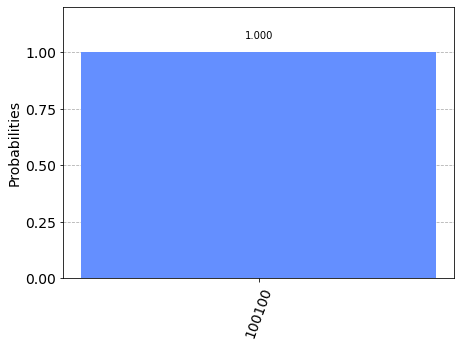

In [28]:
print(res)
counts = execute(myadder,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)